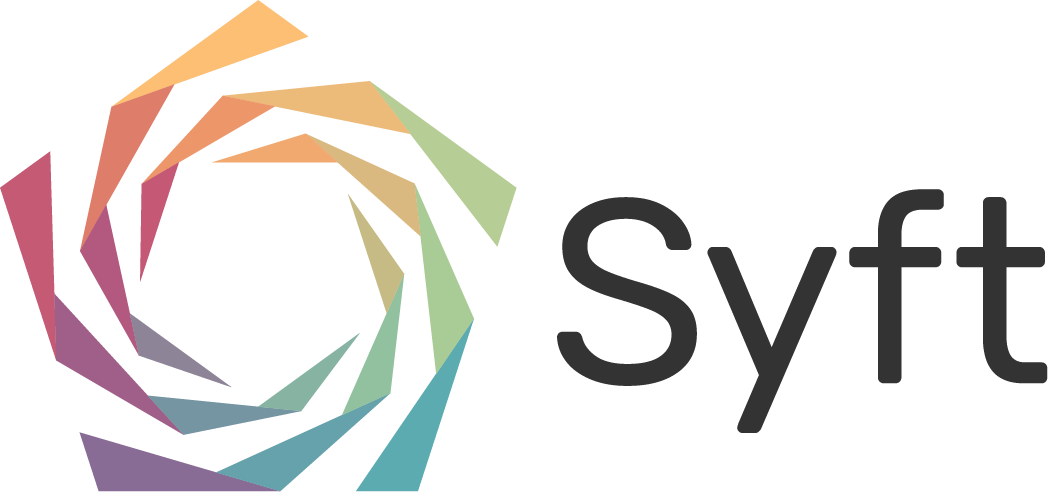

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://localhost:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [1]:
import syft as sy
duet = sy.join_duet(network_url="http://localhost:5000", loopback=True)

In [2]:
import asyncio
async def wait_until(condition_func, timeout=20):
    i = 0
    cond = condition_func(duet)
    while not cond:
        await asyncio.sleep(1)
        i += 1
        if i>=timeout: 
            raise Exception(f"condition not statisfied in {timeout} second")
        cond = condition_func(duet)

# duet.store.pandas

In [3]:
await wait_until(lambda duet:len(duet.store)==3)
duet.store.pandas

ID          Tags       Description  \
0  <UID: bd59aee9a15047eab014d13ebf2d7041>        [tag1]  some description   
1  <UID: a7dca7003ea748cc9101b8495cfc2e34>        [tag2]  some description   
2  <UID: d6ba1b93705242c485d5f3cf7099b33d>  [tag3, tag4]  some description   

              object_type  
0  <class 'torch.Tensor'>  
1  <class 'torch.Tensor'>  
2  <class 'torch.Tensor'>

# request

In [4]:
for ptr in duet.store:
    ptr.request(reason="some reason")

In [5]:
await wait_until(lambda duet:len(duet.requests.requests)==3)
duet.requests.pandas

Requested Object's tags       Reason  \
0                  [tag1]  some reason   
1                  [tag2]  some reason   
2            [tag3, tag4]  some reason   

                                Request ID  \
0  <UID: adb237101c244d28bfbd5bed92e48b7b>   
1  <UID: 8dad9b71efcf4f04b1538292f73dd648>   
2  <UID: b6d1638394b24439a57459600eaab48f>   

                     Requested Object's ID Requested Object's type  
0  <UID: bd59aee9a15047eab014d13ebf2d7041>  <class 'torch.Tensor'>  
1  <UID: a7dca7003ea748cc9101b8495cfc2e34>  <class 'torch.Tensor'>  
2  <UID: d6ba1b93705242c485d5f3cf7099b33d>  <class 'torch.Tensor'>

# iteration

In [6]:
await wait_until(lambda duet: duet.store[-1].tags==["tag_x"])
list_ptr = duet.store[-1]
for p in list_ptr:
    print(p)